#Aula 01

## Introdução

Olá seja bem-vinda ou bem-vindo ao **notebook da aula01**, nesta aula vamos realizar nossa primeira análise de dados e no final já seremos capazes de tirar algumas conclusões.

Nós estaremos desenvolvendo nosso projeto aqui no google colaboratory, assim podemos mesclar células contendo textos em formato markdown e células de código, além disso você não precisar instalar nada na sua máquina. Então que tal começar testando algumas linhas de código.

Nesta primeira célula estamos realizando um ```print()```, lembre-se que esta função python imprime a string que estamos passando como parâmetro, então  o retorno é exibido logo abaixo da célula com código.

In [1]:
print("Lucas Silveira")

Lucas Silveira


Agora vamos analisar a proxima célula de código. 

Aqui estamos fazendo uma atribuição de variável, conforme dito em aula, as atribuições não tem retorno, assim, diferente da célula anterior não temos um *output* logo abaixo do código.

In [2]:
nome_do_filme = "Totoro, o filme"

Agora que criamos a variável ```nome_do_filme```, podemos reutilizá-la, por exemplo na função ```print```, para assim imprimir a *string* "Totoro, o filme".

In [3]:
print(nome_do_filme)

Totoro, o filme


In [4]:
nome_do_filme

'Totoro, o filme'

## Lendo os dados do MovieLens

Nosso primeiro passo foi conhecer e realizar um "hello-world" no colab, agora chegou a hora de importar os dados para o notebook e começar as análises.

Vamos importar a biblioteca [pandas](https://pandas.pydata.org/), um poderoso projeto open source para análise de manipulação de dados. O primeiro passo é ler uma base de dados e podemos fazer isso com o comando ```pd.read_csv()```.

Estamos lendo um arquivo **CSV** (Comma-separated values), neste tipo de arquivo os valores são separados por vírgulas e podem ser abertos em outras ferramentas como excel e google-sheet. CSV não é o único formato lido pelo pandas, temos o ```pd.read_excel()``` que lê arquivos **xlsx** entre diversos outros formatos, você pode encontrar mais informações na seção de [input/output da documentação](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).

Depois de ler o dataset, nós trocamos os nomes das colunas pelos termos em português, logo em seguida utilizamos o método ```filmes.head()``` para visualizar as primeiras 5 linhas do nosso dataframe. Outra forma de visualizar as informações dos dados é utilizando o método ```filmes.sample()```, se você tentar, vai verificar que ele retorna uma linha aleatória do seus dados. Para escolher aleatoriamente mais de 1 linha, por exemplo 5, é só passar esse valor desejado como parâmetro (```filmes.sample(5)```). 

In [5]:
import pandas as pd

In [6]:
filmes = pd.read_csv("../datasets/ml-latest-small/movies.csv")
# filmes é um DataFrame
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Há pouco falamos para consultar a documentação para obter mais informações, mas será que é realmente preciso sair do notebook para tirar algumas dúvidas mais simples? 

Os notebooks facilitam a nossa vida podendo consultar o docstring das funções e métodos, rodando a célula com um **?** na frente da chamada, uma view é aberta com as informações resumidas. Veja a seguir alguns exemplos.

In [7]:
# lendo a documentação de um método/atributo

?filmes.head

Signature: filmes.head(n=5)
Docstring:
Return the first n rows.

Parameters
----------
n : int, default 5
    Number of rows to select.

Returns
-------
obj_head : type of caller
    The first n rows of the caller object.
File:      ~/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py
Type:      method


In [8]:
# lendo a documentação do tipo (docstring)

?filmes

Type:        DataFrame
String form:
filmeId                                             titulo  \
           0           1                 <...>   Action|Animation
           9741                                       Comedy
           
           [9742 rows x 3 columns]
Length:      9742
File:        ~/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with labeled axes (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a dict-like
container for Series objects. The primary pandas data structure

Parameters
----------
data : numpy ndarray (structured or homogeneous), dict, or DataFrame
    Dict can contain Series, arrays, constants, or list-like objects
index : Index or array-like
    Index to use for resulting frame. Will default to np.arange(n) if
    no indexing information part of input data and no index provided
columns : Index or arr

A base de dados que usamos até o momento contém o nome do filme, ano de lançamento e gêneros. O MovieLens conta com outras informações que estão em bases separadas, uma delas é a de avaliações. 

Agora vamos analisar um pouco melhor o dataset de avaliações.

In [10]:
avaliacoes = pd.read_csv("../datasets/ml-latest-small/ratings.csv")
avaliacoes.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Para visualizar algumas linhas estamos usando o ```.head()```, como ela mostra apenas as 5 primeiras linhas não sabemos qual é a quantidade de linhas que temos. Para descobrir a "forma" dos nossos dados podemos utilizar o ```avaliacoes.shape```, retornando uma [tupla](https://www.alura.com.br/artigos/conhecendo-as-tuplas-no-python), onde o primeiro termo indica o número de linhas e o segundo o número de colunas.

In [11]:
avaliacoes.shape

(100836, 4)

In [12]:
len(avaliacoes)

100836

Vamos substituir os nomes das colunas de inglês para português e entender o que são essas colunas. 

usarioId => ID para para usuário que votou em determinado filme.

filmeId => ID para identificar um filme votado.

nota => A nota dada para pelo usuário para o respectivo filme.

momento => A data da votação que não está formatada como data

Como cada linha contém um voto para o respectivo filme é de se esperar que um filme tenha diversos votos, mas repare que nas 5 primeiras linhas temos o filme **1, 3, 6, 47, 50**. Mas e se eu quiser analisar apenas as notas do filme 1, como posso separar essa informação?



In [13]:
avaliacoes.columns = ["usuarioId", "filmeId", "nota", "momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Uma forma para "separar" as informações apenas do **filmeId 1** é chamando o método ```avaliacaoes.query("filmeId==1")```, esse método retornará apenas as linhas para quais a expressão booleana, "filmeId==1", for verdadeira.

Tendo as informações do **filmeId 1** podemos chamar o ```avaliacoes_do_filme_1.describe()```, para analisar as estatítiscas gerais dos dados.

In [14]:
avaliacoes_do_filme_1 = avaliacoes.query("filmeId==1")
avaliacoes_do_filme_1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [15]:
avaliacoes_do_filme_1.describe()

,usuarioId,filmeId,nota,momento
count,215.000000,215.0,215.000000,2.150000e+02
mean,306.530233,1.0,3.920930,1.129835e+09
std,180.419754,0.0,0.834859,2.393163e+08
min,1.000000,1.0,0.500000,8.293223e+08
25%,155.500000,1.0,3.500000,8.779224e+08
50%,290.000000,1.0,4.000000,1.106855e+09
75%,468.500000,1.0,4.500000,1.348523e+09
max,610.000000,1.0,5.000000,1.535710e+09


Caso queira uma estatística particular, podemos apenas chamar o método desajado, repare abaixo como calculamos apenas a média das avaliações do **filmeId 1**.

In [16]:
avaliacoes_do_filme_1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

Calculamos as estatísicas apenas para o **filmeId 1**, mas também podemos chamar o método ```.describe()``` para a base completa (avaliacões).

In [17]:
avaliacoes.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Ok, nós calculamos um tanto de coisa usando `.describe()` e `.mean()`, mas a informação que realmente queremos é a média da nota. Então o ponto é, como calcular a média apenas das notas?

A primeira coisa que precisamos fazer é selecionar apenas as informações de notas. Usando uma estrutura muito parecida com a de [chave-valor dos dicionários python](https://www.alura.com.br/artigos/trabalhando-com-o-dicionario-no-python). 

Com o comando ```avaliacoes["nota"]```, obtemos os valores da coluna nota (repare que o tipo retornado é uma Série pandas, por isso o index de cada nota é mantido). Para calcular a média de todas as notas executamos ```avaliacoes["notas"].means()```


In [18]:
avaliacoes["nota"]

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
5         3.0
6         5.0
7         4.0
8         5.0
9         5.0
10        5.0
11        5.0
12        3.0
13        5.0
14        4.0
15        5.0
16        3.0
17        3.0
18        5.0
19        4.0
20        4.0
21        5.0
22        4.0
23        3.0
24        4.0
25        5.0
26        4.0
27        3.0
28        5.0
29        4.0
         ... 
100806    3.0
100807    4.0
100808    4.0
100809    3.5
100810    3.5
100811    5.0
100812    4.5
100813    4.0
100814    5.0
100815    3.5
100816    3.5
100817    3.0
100818    3.0
100819    3.0
100820    2.5
100821    4.5
100822    3.0
100823    3.0
100824    4.0
100825    4.0
100826    3.5
100827    3.5
100828    3.5
100829    5.0
100830    4.0
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [19]:
avaliacoes["nota"].mean()

3.501556983616962

Podemos calcular também na nota média do **filmeId 1**, repare que o resultado é um pouco maior que a geral. Apenas com essa análise não da para bater o martelo que o filme 1 é acima da média, mas apenas com essa análise conseguimos formular uma primeira hipótese!

In [20]:
avaliacoes_do_filme_1["nota"].mean()

3.9209302325581397

Nós calculamos uma média geral, uma média para o filmeId 1. Agora eu quero calcular a média das notas para todos os filmes, podemos fazer isso usando o método ```.groupby(filmeId)```, o parâmetro passado é para indicar qual coluna ele deve utilizar para "agrupar" os dados. Depois só calcular a média como fizemos anteriormente.



In [21]:
notas_medias_por_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Temos as notas médias calculadas, mas agora precisamos juntar as informações de notas médias com a base de dados **filmes**.

Poderíamos criar uma nova coluna e atribuir a váriável `notas_medias_por_filme`, de forma direta:

```filmes["nota_media"] = notas_medias_por_filme```

Como discutimos em aula, essa não é uma boa prática pois precisamos garantir que a nota média seja do respectivo filme.

Para garantir essa condição vamos utilizar o ```.join()```, criando um novo dataframe (```filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")```). 

Veja como fazer, nas células a seguir.

In [22]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [23]:
notas_medias_por_filme

filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
6         3.946078
7         3.185185
8         2.875000
9         3.125000
10        3.496212
11        3.671429
12        2.421053
13        3.125000
14        3.833333
15        3.000000
16        3.926829
17        3.776119
18        3.700000
19        2.727273
20        2.500000
21        3.494382
22        3.222222
23        3.125000
24        3.125000
25        3.625000
26        3.500000
27        3.333333
28        4.227273
29        4.013158
30        3.000000
            ...   
188189    4.500000
188301    3.666667
188675    3.500000
188751    4.500000
188797    4.000000
188833    4.500000
189043    2.500000
189111    3.000000
189333    3.750000
189381    2.500000
189547    1.000000
189713    2.500000
190183    3.500000
190207    1.500000
190209    4.000000
190213    1.000000
190215    1.500000
190219    1.000000
190221    1.000000
191005    4.500000
193565    3.500000
1935

In [24]:
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


Agora que temos as médias, que tal visualizar o nosso dataframe ordenado pela nota de forma decrescente?

In [25]:
filmes_com_media.sort_values("nota", ascending=False).head(15)

,filmeId,titulo,generos,nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


Fizemos um tanto de análise e manipulação de dados interessante, não é?

Mas diz a verdade, você está sentindo falta daquele gráfico que todo cientista de dados adora =D, então bora plotar nosso primeiro gráfico!

O pandas facilita muito o plot de alguns gráficos simples, apenas selecionamos a informação que gostaríamos de visualizar e chamamos o método ```.plot()```

In [26]:
avaliacoes.query("filmeId == 1")["nota"].plot()

Por padrão o método plotou um gráfico de linhas, o que não é adequado para os dados que estamos analisando.

Precisamos mudar o tipo de gráfico para realizar uma análise mais adequada, para fazer isso apenas alteramos o parâmetro **kind** do método ```.plot```. Vamos plotar um [histograma](https://pt.wikipedia.org/wiki/Histograma) rodando a célula a seguir.

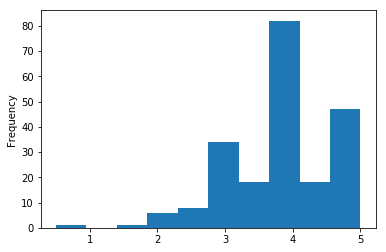

In [27]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')

Legal, agora temos uma visualização muito mais agradavel de analisar. Compare com o gráfico de linhas, qual você acha melhor para análise? 

P.S: Deixar de usar o gráfico de linhas, não significa que sejá uma visualização ruim. Apenas quer dizer que nossos dados não tem características ideias para serem visualizados como um *line plot*, agora pense em uma [série temporal](https://pt.wikipedia.org/wiki/S%C3%A9rie_temporal). **Você acha que o gráfico de linhas ainda seria uma má ideia?**

Antes de analisar o histograms de outros filmes, quero colocar um título na imagem. Vamos ver como podemos fazer isso!


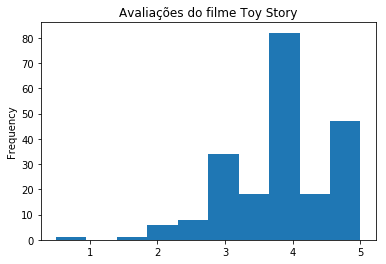

In [28]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

Claro que python tem outras ferramentas muito poderosas para manipular gráficos, uma delas é o [matplotlib](https://matplotlib.org/).

Que tal experimentar um pouquinho esta poderosa ferramenta? 

Vamos importar a lib e adicionar título no gráfico usando o matplotlib, veja como fica na célula a seguir.

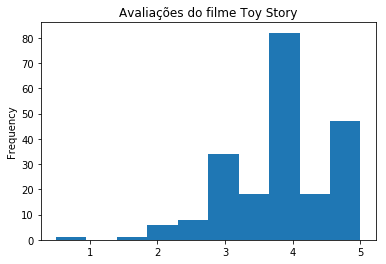

In [29]:
import matplotlib.pyplot as plt

avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

Agora que aprendemos a criar um histograma e manipular os gráficos, vamos plotar informações de outros filmes e realizar uma análise desses gráficos?

Vamos plotar o histograma do filme Jumanji e da animação Liga da justiça: Doom.

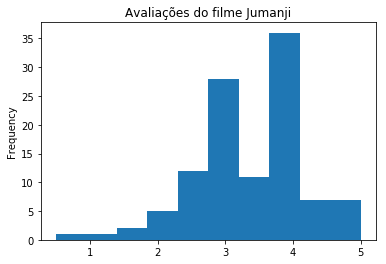

In [30]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Jumanji")

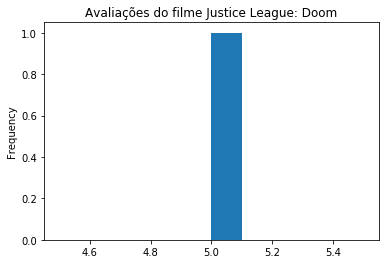

In [31]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

Agora que temos os gráficos, chegou a hora de analisar.

A primeira coisa que preciso saber é o que cada eixo do meu gráfico significa. Então, eixo **x** mostra a nota, enquanto eixo **y** a frequência das notas (quantas vezes determinada nota foi dada). 

Entendido nosso gráfico, vamos contextualizar o cenário que estamos analisando:

 - Temos 3 filmes, dois muito populares (Toy story e Jumanji) e outro que nenhuma pessoa presente no momento da aula conhecia (animação da liga da justiça). O ponto que chamou a atenção, foi que a animação tinha média de nota maior que dois filmes, aparentemente mais popular, Jumaji e Toy Story. **Será que a animação é um filme tão bom assim?**


Dado esse cenário a primeira coisa que me chama a atenção é a animação da liga da justiça ter média de nota igual a 5. Ao analisar o histograma do respectivo filme, verificamos que ele só teve uma avaliação igual a 5, logo, fica evidente que a **quantidade de votos é um aspecto importante na avaliação das médias**. Com apenas uma avaliação, não conseguimos garantir que o filme é realmente bom, tornando a avaliação muito "volátil". Imagina que Liga da Justiça receba mais uma avaliação, com nota 0, assim a média seria 2.5. Apenas com mais essa avaliação o filme passaria a ser considerada um "pior" que Jumanji e Toy Story.

Outro ponto interessante é comparar o histograma de Toy Story e Jumanji, ambos tem médias "relativamente próximas". Mas repare que a distribuição de notas são diferentes, Toy Story recebe mais notas 5 e 4 que qualquer outra nota, enquanto Jumanji recebe mais notas 4 e 3, assim concluímos que a **distribuição das notas também é um fator importante na avaliação das médias**.(Se ficar alguma dúvida sobre esse tema reveja o exemplo que o instrutor apresenta no final na aula) 


Com isso nós fechamos a nossa primeira aula do **#quarentenadados**, viu quanta coisa aprendemos? Que tal colocar isso em prática?


**Crie seu próprio notebook, reproduza nossa aula e resolva os desafios que deixamos para vocês**.


Até a próxima aula!








## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [32]:
filmes_sem_avaliacoes = filmes_com_media.query("nota.isnull()", engine="python")
filmes_sem_avaliacoes

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


In [33]:
len(filmes_sem_avaliacoes)

18

> **Resposta: nesta amostra, existem 18 filmes sem avaliações.**

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [34]:
filmes_com_media = filmes_com_media.rename(columns={"nota" : "nota_media"})
filmes_com_media.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


> **Resposta: feito utilizando o método `DataFrame.rename`.**

## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [35]:
total_votos = avaliacoes.groupby("filmeId")["nota"].count()
filmes_com_media_votos = filmes_com_media.join(total_votos, on="filmeId")
filmes_com_media_votos = filmes_com_media_votos.rename(columns={"nota" : "votos"})
filmes_com_media_votos.head()

,filmeId,titulo,generos,nota_media,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


> **Resposta: semelhante ao cálculo da média das notas, foi feito usando método `count` após realizar o agrupamento pelo "filmeId". Então, a nova coluna foi adicionada ao conjunto usando método `join`.**

## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [36]:
filmes_com_media_votos["votos"].dtype

dtype('float64')

In [45]:
filmes_com_media_votos["nota_media"] = filmes_com_media_votos["nota_media"].round(2)
# converter para Int32 (e nao para int32), porque a coluna possui valores 'NaN'
#filmes_com_media_votos["votos"] = filmes_com_media_votos["votos"].astype("Int32") 
filmes_com_media_votos.head()

,filmeId,titulo,generos,nota_media,votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


> **Resposta: a coluna "nota_media" foi sobrescrita por ela mesma, após executar `.round(2)`, para arrendondar seus valores em 2 casas decimais.**

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [46]:
# lista de todos generos da amostra (comeca vazia)
lista_generos = []

# obter apenas os valores unicos da coluna generos (para ter menos dados e facilitar)
generos = filmes["generos"].unique()

# depois, iterar a lista de generos de cada filme
for index, row in pd.DataFrame(generos).iterrows():
  # quebrar a lista nos pipes para obter um array com os nomes de cada genero e iterar esse array
  for g in row[0].split('|'):
    # incluir na lista de generos, se ainda nao estiver na lista
    if not(g in lista_generos):
      lista_generos.append(g)

# ordenar a lista (ordem alfabetica)
lista_generos.sort()

# mostrar a lista de generos como um data frame
lista_generos = pd.DataFrame(lista_generos)
lista_generos.columns = ["genero"]
lista_generos

,genero
0,(no genres listed)
1,Action
2,Adventure
3,Animation
4,Children
5,Comedy
6,Crime
7,Documentary
8,Drama
9,Fantasy


In [47]:
len(lista_generos)

20


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [48]:
# lista de tuplas (genero, qtde)
generos_qtde = []
# passar por todos os generos possiveis
for index, row in lista_generos.iterrows():
  g = row["genero"]
  count = 0
  # passar por todos os filmes
  for i, f in filmes.iterrows():
    # se o genero estiver na lista de generos do filme, incrementar contador
    if (g in f["generos"].split('|')):
      count += 1
  # ao final, adiciona nova tupla, com (genero, qtde obtida)
  generos_qtde.append((g, count))

# criar um DataFrame e formatar
generos_qtde = pd.DataFrame(generos_qtde)  
generos_qtde.columns = ["genero", "qtde"]
generos_qtde

,genero,qtde
0,(no genres listed),34
1,Action,1828
2,Adventure,1263
3,Animation,611
4,Children,664
5,Comedy,3756
6,Crime,1199
7,Documentary,440
8,Drama,4361
9,Fantasy,779


## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

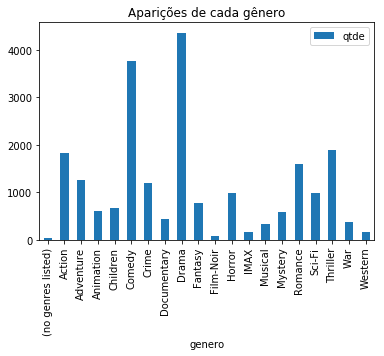

In [49]:
generos_qtde.plot(kind='bar',
                  x="genero",
                  title='Aparições de cada gênero')

#Não esqueça de compartilhar a solução dos seus desafios com nossos instrutores, seja no twitter ou linkedin. Boa sorte!